In [2]:
#数据导入
import numpy as np
import pandas as pd
df_member = pd.read_csv('/Users/blytheluo/Documents/GitHub/geektime/留存关14/易速鲜花会员留存.csv')
df_member.head()

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,女,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.6,593.3,否
1,2,男,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.9,542.4,否
2,3,男,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.9,280.85,是
3,4,男,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.0,1237.85,是
4,5,女,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.4,571.45,否


In [3]:
#数据清洗
df_member.describe()

,用户码,入会月数,平均月消费
count,7043.000000,7043.000000,7043.000000
mean,3522.000000,32.371149,64.761692
std,2033.283305,24.559481,30.090047
min,1.000000,0.000000,18.250000
25%,1761.500000,9.000000,35.500000
50%,3522.000000,29.000000,70.350000
75%,5282.500000,55.000000,89.850000
max,7043.000000,72.000000,118.750000


In [4]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(df_member['总消费'])

False

In [5]:
df_member['总消费'] = pd.to_numeric(df_member['总消费'], errors='coerce')
df_member['总消费'].fillna(0, inplace=True)

In [6]:
is_numeric_dtype(df_member['总消费'])

True

In [7]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [8]:
from matplotlib.font_manager import _rebuild
_rebuild()

from matplotlib import font_manager
a = sorted([f.name for f in font_manager.fontManager.ttflist])
for i in a:
    print(i)

.Aqua Kana
.Arabic UI Display
.Arabic UI Text
.Helvetica Neue DeskInterface
.Keyboard
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Con

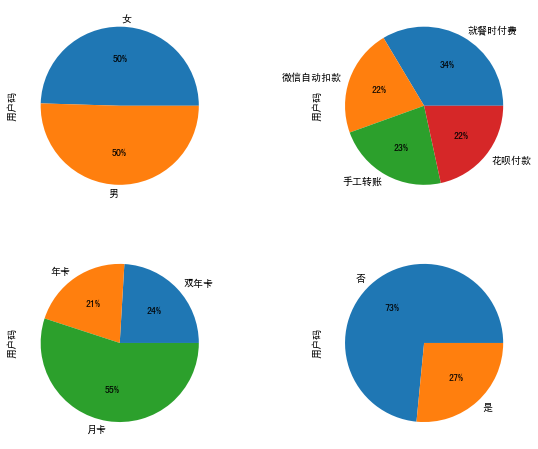

In [9]:
#数据可视化
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax = df_member.groupby('性别').count()['用户码'].plot.pie(autopct='%1.0f%%')
plt.subplot(2,2,2)
ax = df_member.groupby('会费支付方式').count()['用户码'].plot.pie(autopct='%1.0f%%')
plt.subplot(2,2,3)
ax = df_member.groupby('会员卡类型').count()['用户码'].plot.pie(autopct='%1.0f%%')
plt.subplot(2,2,4)
ax = df_member.groupby('已停付会费').count()['用户码'].plot.pie(autopct='%1.0f%%')
plt.show()

In [10]:
df_member['已停付会费'].replace(to_replace='是', value=1, inplace=True)
df_member['已停付会费'].replace(to_replace='否', value=0, inplace=True)
df_member['性别'].replace(to_replace='女', value=0, inplace=True)
df_member['性别'].replace(to_replace='男', value=1, inplace=True)

In [11]:
# 其它的是、否字段转换成布尔型数据
binary_features = ['玫瑰套餐', '紫罗兰套餐', '郁金香套餐', 
                   '百合套餐', '康乃馨套餐', '胡姬花套餐', 
                   '生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field] == '是'

In [12]:
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,0,True,True,False,True,False,True,True,False,年卡,9,手工转账,65.60,593.30,0
1,2,1,False,False,False,False,False,False,False,True,月卡,9,手工转账,59.90,542.40,0
2,3,1,False,False,False,False,True,False,False,False,月卡,4,就餐时付费,73.90,280.85,1
3,4,1,True,False,False,True,True,False,True,True,月卡,13,就餐时付费,98.00,1237.85,1
4,5,0,False,True,False,False,False,True,True,True,月卡,9,花呗付款,69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,年卡,13,手工转账,55.15,742.90,0
7039,7040,1,False,False,False,True,False,False,False,False,月卡,2,手工转账,50.30,92.75,0
7040,7041,1,True,False,False,False,False,False,False,True,月卡,22,就餐时付费,85.10,1873.70,1
7041,7042,1,True,True,True,False,True,True,False,True,双年卡,67,手工转账,67.85,4627.65,0


In [13]:
#Kaplan-Meier生存模型
!pip install lifelines

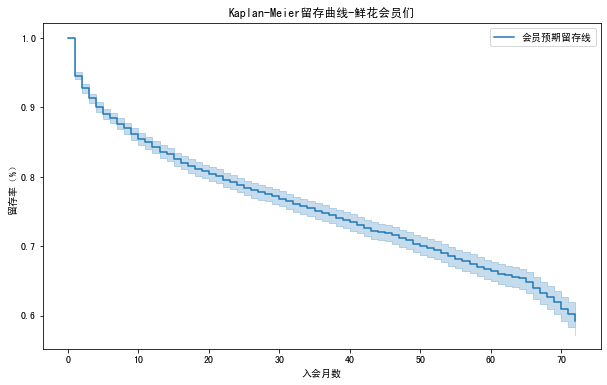

In [14]:
import lifelines
kmf = lifelines.KaplanMeierFitter()
kmf.fit(df_member['入会月数'],
        event_observed=df_member['已停付会费'],
        label='会员预期留存线')
fig, ax = plt.subplots(figsize=(10,6))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier留存曲线-鲜花会员们')
ax.set_xlabel('入会月数')
ax.set_ylabel('留存率（%）')
plt.show()

In [15]:
def life_by_cat(feature, t='入会月数', event='已停付会费', df=df_member, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat)

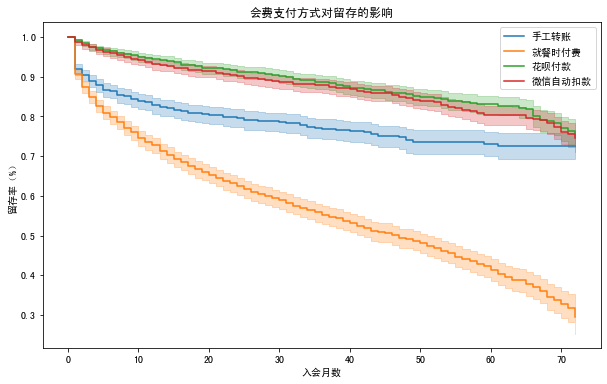

In [16]:
fig_pmt, ax_pmt = plt.subplots(figsize=(10,6))
life_by_cat(feature='会费支付方式', ax=ax_pmt)
ax_pmt.set_title('会费支付方式对留存的影响')
ax_pmt.set_xlabel('入会月数')
ax_pmt.set_ylabel('留存率（%）')
plt.show()

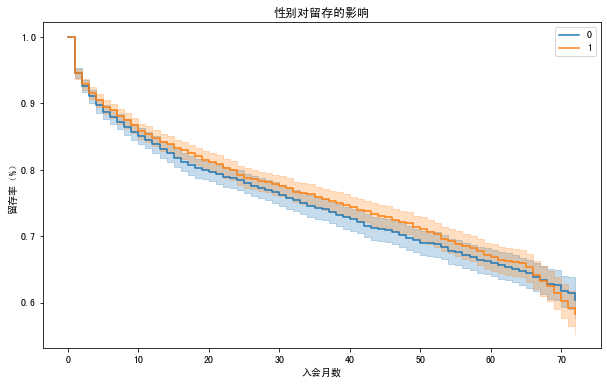

In [17]:
fig_gender, ax_gender = plt.subplots(figsize=(10,6))
life_by_cat(feature='性别', ax=ax_gender)
ax_gender.set_title('性别对留存的影响')
ax_gender.set_xlabel('入会月数')
ax_gender.set_ylabel('留存率（%）')
plt.show()

In [18]:
#把分类字段转换为哑编码
category_features = ['会员卡类型', '会费支付方式'] #要转换的分类的字段
df_member = pd.get_dummies(df_member, #哑变量的个数会比总类别数少1 
                           drop_first=True, #这是因为drop_first=True
                           columns=category_features) #这能够避免回归中的多重共线性问题 
df_member #显示数据

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.60,593.30,0,1,0,0,1,0
1,2,1,False,False,False,False,False,False,False,True,9,59.90,542.40,0,0,1,0,1,0
2,3,1,False,False,False,False,True,False,False,False,4,73.90,280.85,1,0,1,0,0,0
3,4,1,True,False,False,True,True,False,True,True,13,98.00,1237.85,1,0,1,0,0,0
4,5,0,False,True,False,False,False,True,True,True,9,69.40,571.45,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,13,55.15,742.90,0,1,0,0,1,0
7039,7040,1,False,False,False,True,False,False,False,False,2,50.30,92.75,0,0,1,0,1,0
7040,7041,1,True,False,False,False,False,False,False,True,22,85.10,1873.70,1,0,1,0,0,0
7041,7042,1,True,True,True,False,True,True,False,True,67,67.85,4627.65,0,0,0,0,1,0


In [19]:
cph = lifelines.CoxPHFitter()

In [20]:
cph.fit(df_member, duration_col='入会月数',
       event_col='已停付会费', show_progress=False)

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

<AxesSubplot:>

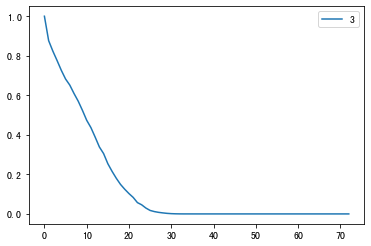

In [21]:
cph.predict_survival_function(df_member.loc[3]).plot()

<AxesSubplot:title={'center':'各个特征的留存相关系数'}, xlabel='log(HR) (95% CI)'>

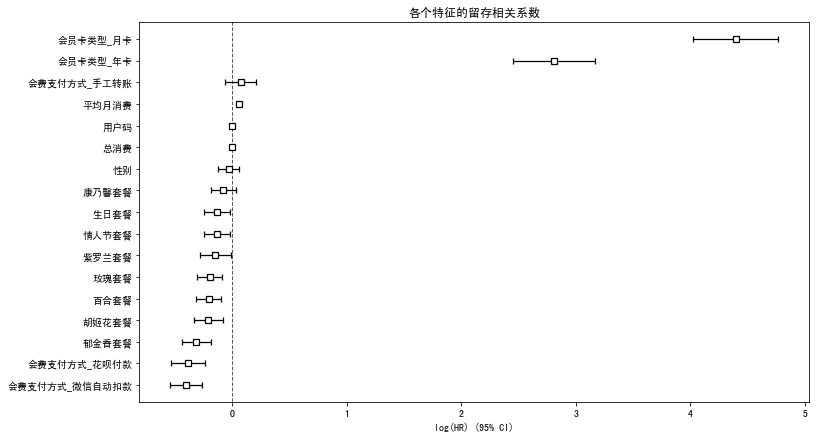

In [22]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('各个特征的留存相关系数')
cph.plot(ax=ax)

In [24]:
X = df_member.drop(['用户码','已停付会费'], axis=1)
y = df_member.已停付会费.values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [26]:
#算法选择1-逻辑回归
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [27]:
logreg.fit(X_train, y_train)

/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
print('准确率{:.2f}%'.format(logreg.score(X_test, y_test)*100))

准确率80.70%


In [33]:
y_pred = logreg.predict(X_test)
print('测试集第一个用户结果', y_pred[0])

测试集第一个用户结果 1


In [34]:
#算法选择2-神经网络
!pip install keras
!pip install tensorflow

     |████████████████████████████████| 1.3 MB 661 kB/s eta 0:00:01
     |████████████████████████████████| 207.1 MB 9.7 MB/s eta 0:00:012     |█████████████████████▎          | 137.8 MB 4.4 MB/s eta 0:00:16     |███████████████████████▍        | 151.4 MB 7.8 MB/s eta 0:00:08     |███████████████████████████▍    | 177.1 MB 23.6 MB/s eta 0:00:02
     |████████████████████████████████| 57 kB 8.3 MB/s  eta 0:00:01
     |████████████████████████████████| 126 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 685 kB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.9 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 2.7 MB/s eta 0:00:011
     |████████████████████████████████| 463 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 199.0 MB 134 kB/s eta 0:00:011    |█████                           | 31.3 MB 3.7 MB/s eta 0:00:45     |█████████████████              

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [35]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
dnn = Sequential()
dnn.add(Dense(units=12, input_dim=17, activation ='relu'))
dnn.add(Dense(units=24,activation = 'relu' ))
dnn.add(Dense(units=1, activation = 'sigmoid'))
dnn.summary()

dnn.compile(optimizer = 'RMSProp',
           loss= 'binary_croosentropy',
           metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [38]:
X_train.shape #X_train目前的形状

(5634, 17)

In [39]:
X_train = np.asarray(X_train).astype(np.float32) # 转换为NumPy张量
X_test = np.asarray(X_test).astype(np.float32) # 转换为NumPy张量

In [40]:
X_train.dtype #X_train转换后的类型

dtype('float32')

In [47]:
X

,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,0,True,True,False,True,False,True,True,False,9,65.60,593.30,1,0,0,1,0
1,1,False,False,False,False,False,False,False,True,9,59.90,542.40,0,1,0,1,0
2,1,False,False,False,False,True,False,False,False,4,73.90,280.85,0,1,0,0,0
3,1,True,False,False,True,True,False,True,True,13,98.00,1237.85,0,1,0,0,0
4,0,False,True,False,False,False,True,True,True,9,69.40,571.45,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,False,False,True,False,False,True,False,False,13,55.15,742.90,1,0,0,1,0
7039,1,False,False,False,True,False,False,False,False,2,50.30,92.75,0,1,0,1,0
7040,1,True,False,False,False,False,False,False,True,22,85.10,1873.70,0,1,0,0,0
7041,1,True,True,True,False,True,True,False,True,67,67.85,4627.65,0,0,0,1,0


In [48]:
X = df_member.drop(['用户码','已停付会费'], axis = 1) # 构建特征集，用户码字段属于无用特征
y = df_member.已停付会费.values # 构建标签集

In [49]:
from sklearn.model_selection import train_test_split #导入train_test_split模块
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #拆分数据集

In [50]:
import keras # 导入Keras库
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
dnn = Sequential() # 创建一个序贯DNN模型
dnn.add(Dense(units=12, input_dim=17, activation = 'relu')) # 添加输入层
dnn.add(Dense(units=24, activation = 'relu')) # 添加隐层
dnn.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
dnn.summary() # 显示网络模型（这个语句不是必须的）
# 编译神经网络，指定优化器，损失函数，以及评估标准
dnn.compile(optimizer = 'RMSProp', #优化器
            loss = 'binary_crossentropy', #损失函数
            metrics = ['acc']) #评估标准

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                216       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [51]:
X_train.shape #X_train目前的形状

(5634, 17)

In [52]:
X_train = np.asarray(X_train).astype(np.float32) # 转换为NumPy张量
X_test = np.asarray(X_test).astype(np.float32) # 转换为NumPy张量

In [53]:
X_train.dtype #X_train转换后的类型

dtype('float32')

In [54]:
history = dnn.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #这里直接从训练集数据中拆分验证集，更方便

Epoch 1/30
71/71 [==============================] - 1s 3ms/step - loss: 2.8754 - acc: 0.6801 - val_loss: 1.3365 - val_acc: 0.7799
Epoch 2/30
71/71 [==============================] - 0s 1ms/step - loss: 1.8885 - acc: 0.6765 - val_loss: 2.0858 - val_acc: 0.7826
Epoch 3/30
71/71 [==============================] - 0s 1ms/step - loss: 1.8699 - acc: 0.6843 - val_loss: 1.2619 - val_acc: 0.7853
Epoch 4/30
71/71 [==============================] - 0s 1ms/step - loss: 1.7758 - acc: 0.6914 - val_loss: 2.3946 - val_acc: 0.7862
Epoch 5/30
71/71 [==============================] - 0s 1ms/step - loss: 1.8457 - acc: 0.6989 - val_loss: 0.7173 - val_acc: 0.7303
Epoch 6/30
71/71 [==============================] - 0s 1ms/step - loss: 1.8067 - acc: 0.6943 - val_loss: 0.7854 - val_acc: 0.7471
Epoch 7/30
71/71 [==============================] - 0s 1ms/step - loss: 1.8165 - acc: 0.6909 - val_loss: 1.5089 - val_acc: 0.7844
Epoch 8/30
71/71 [==============================] - 0s 1ms/step - loss: 1.7335 - acc: 0.70

In [55]:
def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, 'bo', label='Training loss')
    plt.plot(epochs, val_acc, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

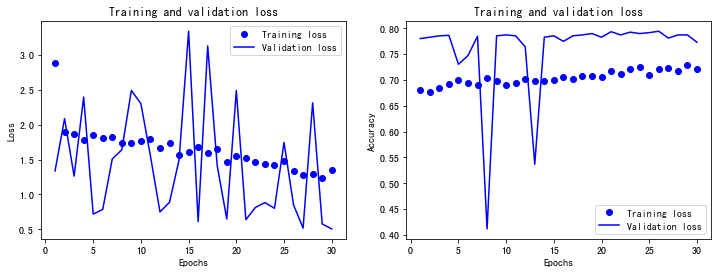

In [56]:
show_history(history) # 调用这个函数

In [57]:
result = dnn.evaluate(X_test, y_test)
print('DNN的测试准确率为','{0:.2f}%'.format(result[1]*100))

45/45 [==============================] - 0s 1ms/step - loss: 0.5475 - acc: 0.7771
DNN的测试准确率为 77.71%


In [58]:
prediction = dnn.predict(X_test)
print('第一个用户分类结果：', np.argmax(prediction[0]))

第一个用户分类结果： 0


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/30
71/71 [==============================] - 0s 2ms/step - loss: 0.5193 - acc: 0.7364 - val_loss: 0.4778 - val_acc: 0.7711
Epoch 2/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4855 - acc: 0.7699 - val_loss: 0.4608 - val_acc: 0.7782
Epoch 3/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4691 - acc: 0.7786 - val_loss: 0.4512 - val_acc: 0.7764
Epoch 4/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4619 - acc: 0.7803 - val_loss: 0.4464 - val_acc: 0.7755
Epoch 5/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4564 - acc: 0.7826 - val_loss: 0.4410 - val_acc: 0.7791
Epoch 6/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4519 - acc: 0.7834 - val_loss: 0.4373 - val_acc: 0.7808
Epoch 7/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4478 - acc: 0.7883 - val_loss: 0.4356 - val_acc: 0.7764
Epoch 8/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4443 - acc: 0.78

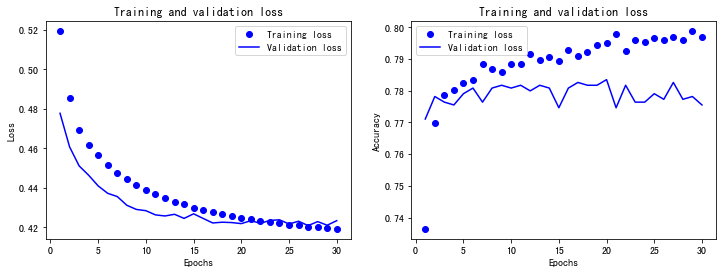

In [60]:
history = dnn.fit(X_train, y_train,
                 epochs=30,
                 batch_size=64,
                 validation_split=0.2)
show_history(history)

In [61]:
result = dnn.evaluate(X_test, y_test)
print('DNN(归一化后)准确率', '{0:.2f}%'.format(result[1]*100))

45/45 [==============================] - 0s 1ms/step - loss: 0.4359 - acc: 0.7935
DNN(归一化后)准确率 79.35%
